In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
from citipy import citipy
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=105b7864620dd447e068fa2e035fde71


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')\
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | suntar
Processing Record 2 of Set 1 | zaragoza
Processing Record 3 of Set 1 | rabaul
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | jinchang
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | charters towers
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | diego de almagro
Processing Record 14 of Set 1 | sinkat
City not found. Skipping...
Processing Record 15 of Set 1 | conceicao da barra
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | talavera 

Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | kharsawan
Processing Record 41 of Set 4 | kedrovyy
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | keti bandar
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | eureka
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | bafoulabe
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | nome
Processing Record 50 of Set 4 | meyungs
City not found. Skipping...
Processing Record 1 of Set 5 | omboue
Processing Record 2 of Set 5 | barstow
Processing Record 3 of Set 5 | bella vista
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | muisne
Processing Record 7 of Set 5 | pochutla
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | drabiv
Processing Record 10 of Set 5 | imperia
Processing Record 11 of Set 5 | port elizabeth
Processi

Processing Record 26 of Set 8 | corredor
Processing Record 27 of Set 8 | forbes
Processing Record 28 of Set 8 | almenara
Processing Record 29 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 8 | hastings
Processing Record 31 of Set 8 | nemuro
Processing Record 32 of Set 8 | baruun-urt
Processing Record 33 of Set 8 | santa vitoria
Processing Record 34 of Set 8 | asyut
Processing Record 35 of Set 8 | seddon
Processing Record 36 of Set 8 | constantine
Processing Record 37 of Set 8 | pangody
Processing Record 38 of Set 8 | talcahuano
Processing Record 39 of Set 8 | nouna
Processing Record 40 of Set 8 | tigil
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | kaitangata
Processing Record 43 of Set 8 | ilulissat
Processing Record 44 of Set 8 | boda
Processing Record 45 of Set 8 | ukiah
Processing Record 46 of Set 8 | hithadhoo
Processing Record 47 of Set 8 | haines junction
Processing Record 48 of Set 8 | yanchukan
City not found. Skippin

Processing Record 10 of Set 12 | hirara
Processing Record 11 of Set 12 | bennettsville
Processing Record 12 of Set 12 | belmonte
Processing Record 13 of Set 12 | qandala
Processing Record 14 of Set 12 | celestun
Processing Record 15 of Set 12 | ji-parana
City not found. Skipping...
Processing Record 16 of Set 12 | ninghai
Processing Record 17 of Set 12 | silva jardim
Processing Record 18 of Set 12 | padang
Processing Record 19 of Set 12 | olafsvik
Processing Record 20 of Set 12 | loandjili
Processing Record 21 of Set 12 | plettenberg bay
Processing Record 22 of Set 12 | san andres
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | ondarroa
Processing Record 25 of Set 12 | calama
Processing Record 26 of Set 12 | huilong
Processing Record 27 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 28 of Set 12 | niscemi
Processing Record 29 of Set 12 | rairangpur
Processing Record 30 of Set 12 | warqla
City not found. Skipping...
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Suntar,62.1444,117.6319,57.94,71,91,5.61,RU,2021-06-02 18:40:10
1,Zaragoza,41.6561,-0.8773,82.85,40,20,4.00,ES,2021-06-02 18:37:07
2,Rabaul,-4.1967,152.1721,78.53,83,79,5.46,PG,2021-06-02 18:40:11
3,Kavieng,-2.5744,150.7967,80.62,79,100,5.95,PG,2021-06-02 18:39:54
4,Tiksi,71.6872,128.8694,47.55,75,100,10.31,RU,2021-06-02 18:40:11
5,Jinchang,38.4953,102.1739,56.57,16,100,1.23,CN,2021-06-02 18:40:04
6,Avarua,-21.2078,-159.7750,77.05,69,65,12.66,CK,2021-06-02 18:39:49
7,Charters Towers,-20.1000,146.2667,59.97,93,79,5.99,AU,2021-06-02 18:40:12
8,Saskylakh,71.9167,114.0833,35.01,89,100,18.95,RU,2021-06-02 18:40:12
9,Punta Arenas,-53.1500,-70.9167,35.62,69,0,4.74,CL,2021-06-02 18:36:19


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Suntar,RU,2021-06-02 18:40:10,62.1444,117.6319,57.94,71,91,5.61
1,Zaragoza,ES,2021-06-02 18:37:07,41.6561,-0.8773,82.85,40,20,4.00
2,Rabaul,PG,2021-06-02 18:40:11,-4.1967,152.1721,78.53,83,79,5.46
3,Kavieng,PG,2021-06-02 18:39:54,-2.5744,150.7967,80.62,79,100,5.95
4,Tiksi,RU,2021-06-02 18:40:11,71.6872,128.8694,47.55,75,100,10.31
5,Jinchang,CN,2021-06-02 18:40:04,38.4953,102.1739,56.57,16,100,1.23
6,Avarua,CK,2021-06-02 18:39:49,-21.2078,-159.7750,77.05,69,65,12.66
7,Charters Towers,AU,2021-06-02 18:40:12,-20.1000,146.2667,59.97,93,79,5.99
8,Saskylakh,RU,2021-06-02 18:40:12,71.9167,114.0833,35.01,89,100,18.95
9,Punta Arenas,CL,2021-06-02 18:36:19,-53.1500,-70.9167,35.62,69,0,4.74


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

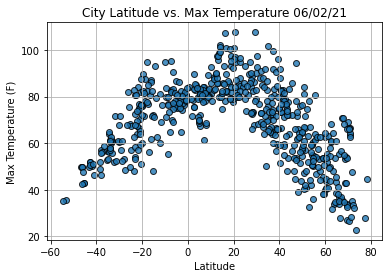

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

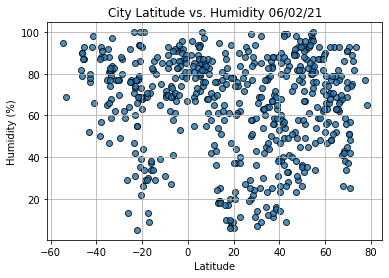

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

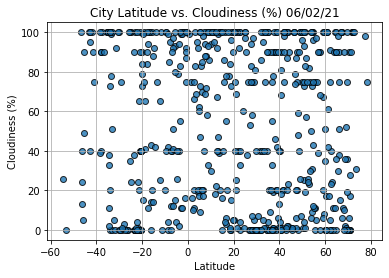

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

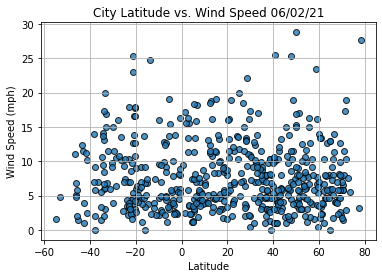

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()